In [251]:
import statsmodels as sm
import numpy as np
from scipy.stats import multivariate_normal
from scipy.stats import norm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



part a: Draw a histogram of the total number of rejections,
R for ρ = 0, 0.95. Explain your results.

In [252]:
# vec 1000
# 750:0
# 250:2.5
alpha = 0.1
ro = 0

# setting for plot
sns.set_style('dark')
sns.set(rc={'figure.figsize':(11.7,8.27)})



def sample(ro):
    # mu vector
    vector = np.zeros(1000)
    vector[750:1000] = 2.5

    # cov matrix:
    mat = np.zeros((1000,1000))
    np.fill_diagonal(mat, 1 - ro)
    mat = mat + ro

    #todo N = 5000
    y = np.random.multivariate_normal(vector, mat, 5000)

    # p_values - survive function (1 - area):
    p_vals = 1 - norm.cdf(y)

    return p_vals

In [253]:

# reject, p_vals_corrected, _, _ = sm.stats.multitest.multipletests(p_vals[0,:], alpha=0.1, method='fdr_bh', returnsorted=False)
# #print(reject)
#
# x = pd.DataFrame(reject)
# x['ord_m'] = np.arange(1000)
# less = x[x['ord_m'] < 750]
# more = x[x['ord_m'] >= 750]
# more
#
# less[0].sum()

def calc_R_V(ro, flag_Q=False, flag_split=False):
    p_vals = sample(ro)
    R_val = np.zeros(5000)
    V_val = np.zeros(5000)
    Q_val = np.zeros(5000)

    flag_0 = False
    flag_200 = False
    flag_1000 = False

    for i in range(5000):
        reject, p_vals_corrected, _, _ = sm.stats.multitest.multipletests(p_vals[i,:], alpha=0.1, method='fdr_bh', returnsorted=False)
        R = reject.sum()

        if flag_split:
            if 200 < R < 400 and flag_200 == False:
                flag_200 = True
                sns.distplot(p_vals_corrected[:750], label="mu=0", kde=False, hist=True, bins=10)
                line = plt.axvline(0.1, color='purple', alpha=0.6)
                plt.title("histogram for correct p_vals for 200 < #Rejects < 400 until m_0 for ro={}".format(ro))
                plt.xlabel("p_vals corrected")
                plt.ylabel("# of appearance")
                plt.legend()
                plt.show()

                sns.distplot(p_vals_corrected[750:], label="mu=2.5", kde=False, hist=True, bins=10)
                line = plt.axvline(0.1, color='purple', alpha=0.6)
                plt.title("histogram for correct p_vals for 200 < #Rejects < 400 from m_0 until 1000 for ro={}".format(ro))
                plt.xlabel("p_vals corrected")
                plt.ylabel("# of appearance")
                plt.legend()
                plt.show()

            if 980 < R and flag_1000 == False:
                flag_1000 = True
                sns.distplot(p_vals_corrected[:750], label="mu=0", kde=False, hist=True, bins=10)
                line = plt.axvline(0.1, color='purple', alpha=0.6)
                plt.title("histogram for correct p_vals for 980 < #Rejects until m_0 for ro={}".format(ro))
                plt.xlabel("p_vals corrected")
                plt.ylabel("# of appearance")
                plt.legend()
                plt.show()

                sns.distplot(p_vals_corrected[750:], label="mu=2.5", kde=False, hist=True, bins=10)
                line = plt.axvline(0.1, color='purple', alpha=0.6)
                plt.title("histogram for correct p_vals for 980 < #Rejects < 400 from m_0 until 1000 for ro={}".format(ro))
                plt.xlabel("p_vals corrected")
                plt.ylabel("# of appearance")
                plt.legend()
                plt.show()


            if R < 20 and flag_0 == False:
                flag_0 = True
                sns.distplot(p_vals_corrected[:750], label="mu=0", kde=False)
                line = plt.axvline(0.1, color='purple', alpha=0.6)
                plt.title("histogram for correct p_vals for #Rejects < 20 until m_0 for ro={}".format(ro))
                plt.xlabel("p_vals corrected")
                plt.ylabel("# of appearance")
                plt.legend()
                plt.show()
                #print(p_vals_corrected)

                sns.distplot(p_vals_corrected[750:], label="mu=2.5", kde=False)
                line = plt.axvline(0.1, color='purple', alpha=0.6)
                plt.title("histogram for correct p_vals for #Rejects < 20 from m_0 until 1000 for ro={}".format(ro))
                plt.xlabel("p_vals corrected")
                plt.ylabel("# of appearance")
                plt.legend()
                plt.show()


        V = reject[:750].sum()
        R_val[i] = R
        R_plus = max(R, 1)
        Q_val[i] = V / R_plus

        V_val[i] = V

    if flag_Q:
        return Q_val

    plt.title('histogram of # of V (false rejects)')
    plt.xlabel("# false rejects")
    plt.ylabel("# of appearance")
    sns.distplot(V_val, kde=False)
    plt.show()
    plt.title('histogram of # of R (total rejects)')
    plt.xlabel("# total rejects")
    plt.ylabel("# of appearance")
    sns.distplot(R_val, kde=False)
    plt.show()
    plt.title('histogram of # of Q (false discovery proportion)')
    plt.xlabel("Q val")
    plt.ylabel("# of appearance")
    sns.distplot(Q_val, kde=False)
    plt.show()

np.set_printoptions(suppress=True)
x = sample(ro=0.8)[0,:]




# mean_Q = np.zeros(21)
# Q_std = np.zeros(21)
# j=0
# for i in range(0,105,5):
#     print(i)
#
#     i = i / 100
#
#     Q_values = calc_R_V(i, flag_Q=True)
#     mean_Q[j] = Q_values.mean()
#     Q_std[j] = Q_values.std()
#
#     j = j+1
#
# print(mean_Q)
# print(Q_std)
#
# plt.title('mean_Q')
# sns.lineplot(x=np.arange(0,105,5) / 100, y=mean_Q)
# plt.show()
#
# plt.title('Q_std')
# sns.lineplot(x=np.arange(0,105,5) / 100, y=Q_std)
# plt.show()
#
# print(sample(1)[0,:])


histograma of R

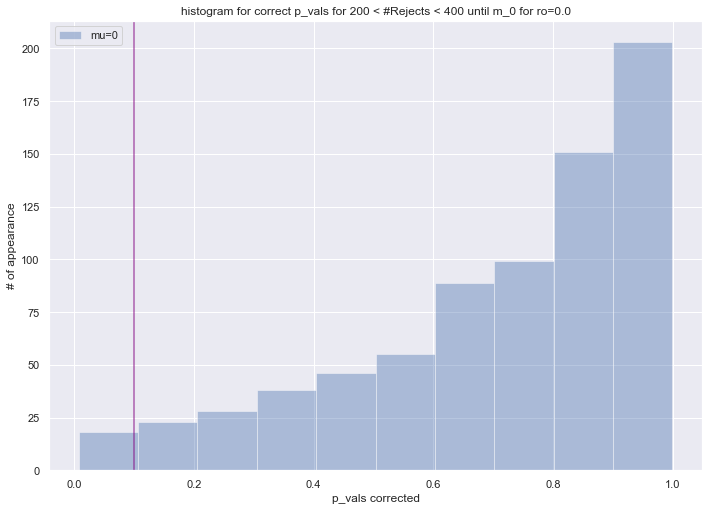

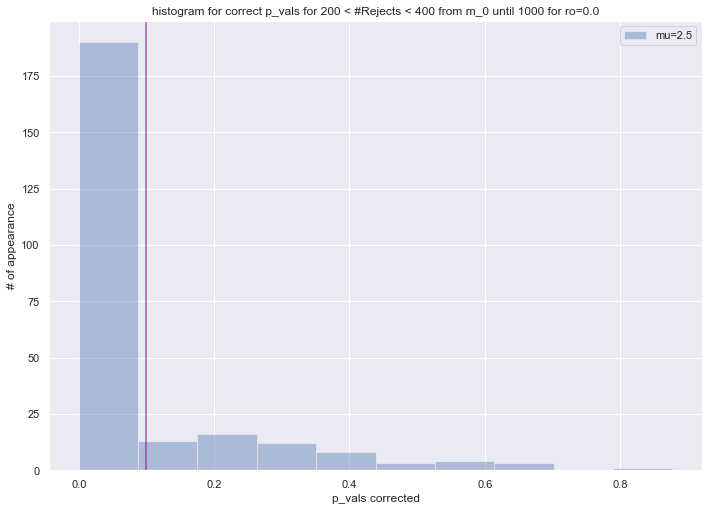

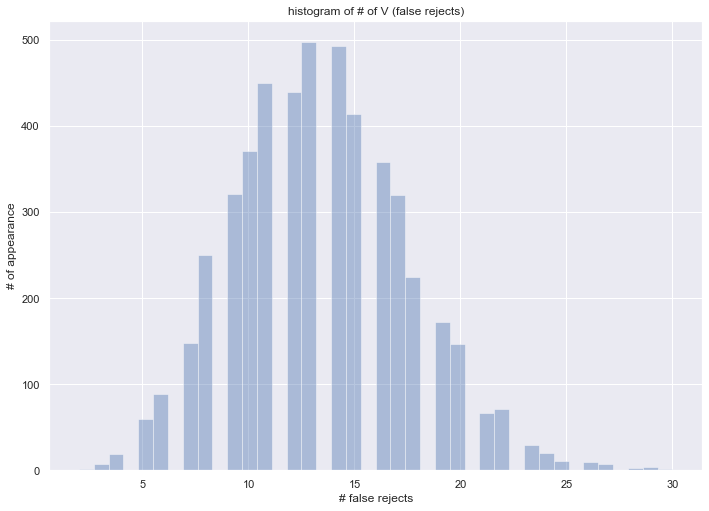

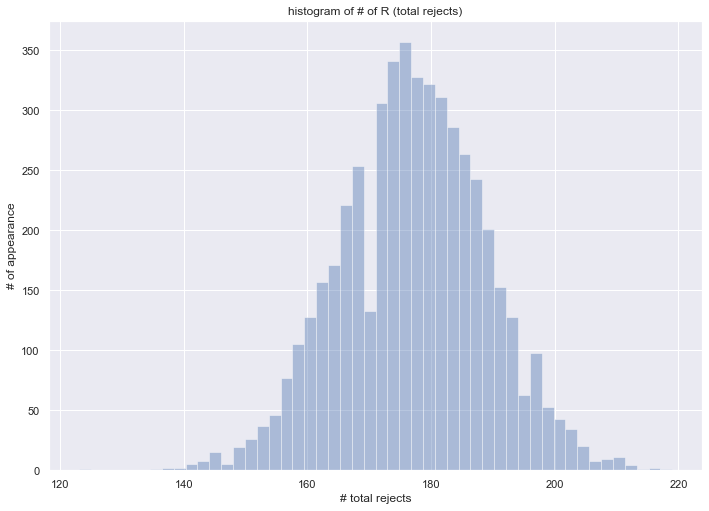

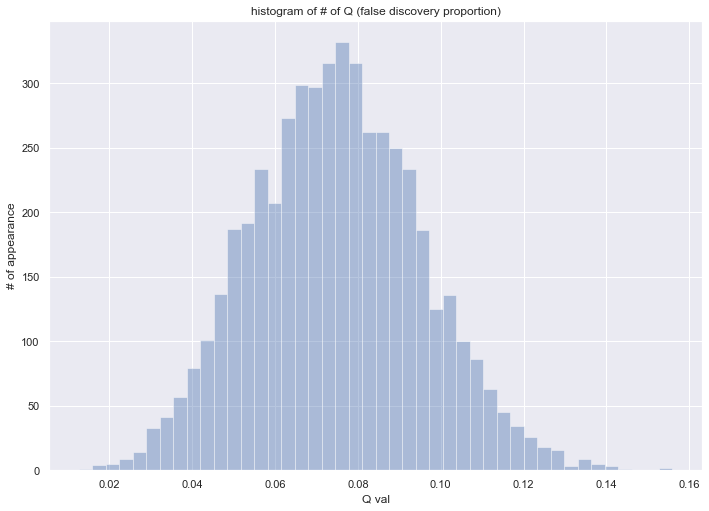

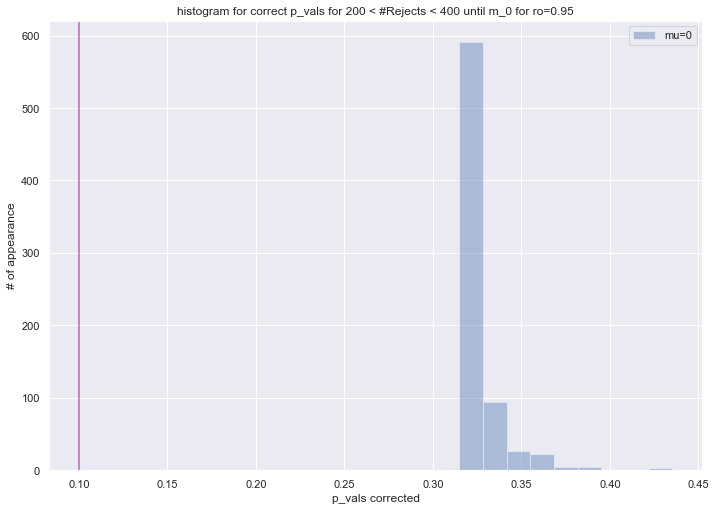

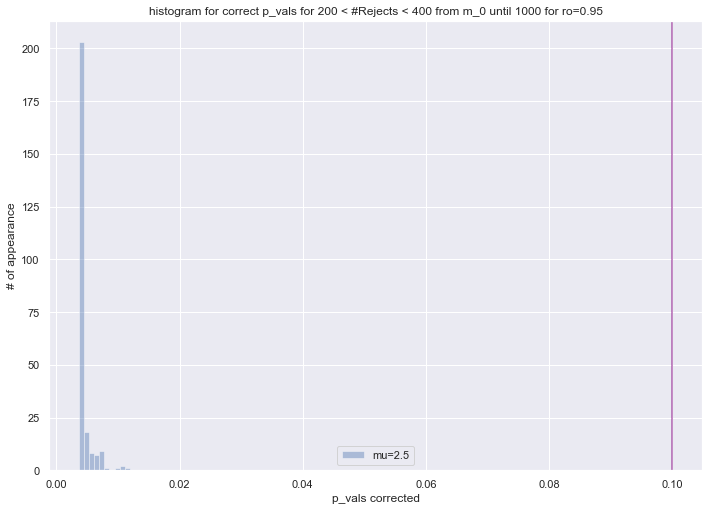

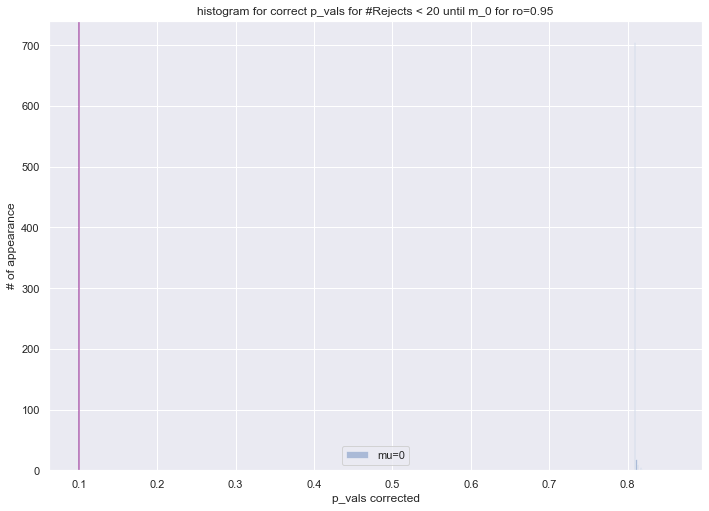

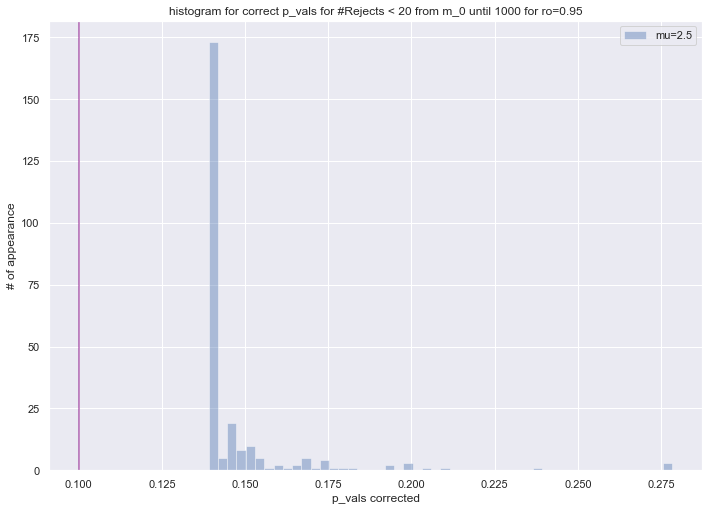

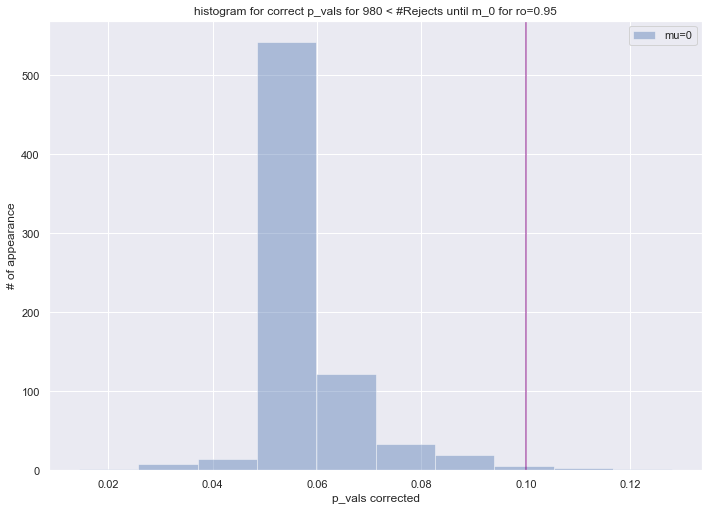

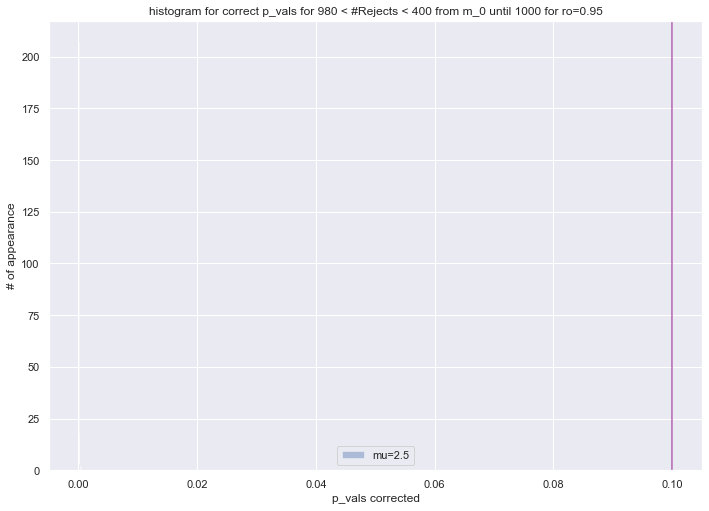

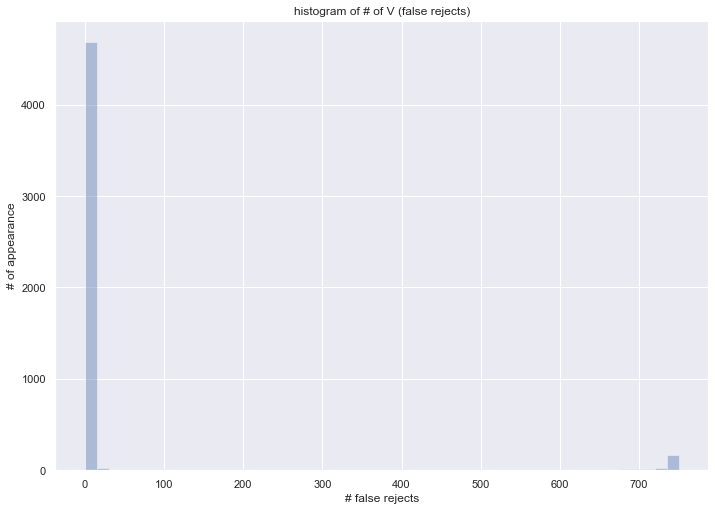

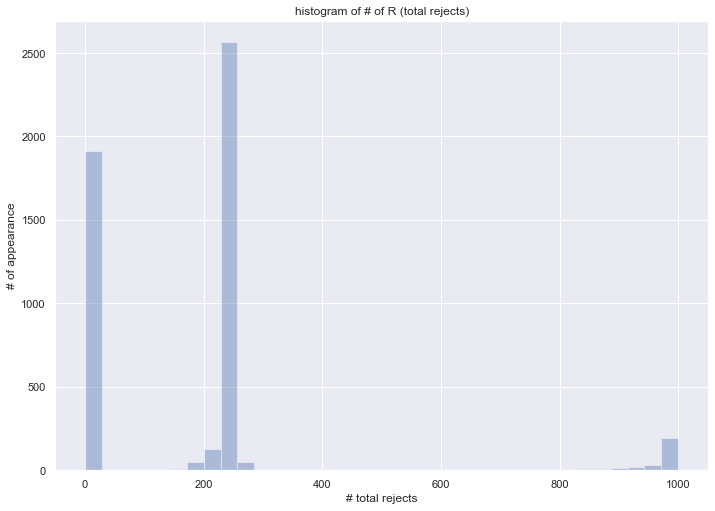

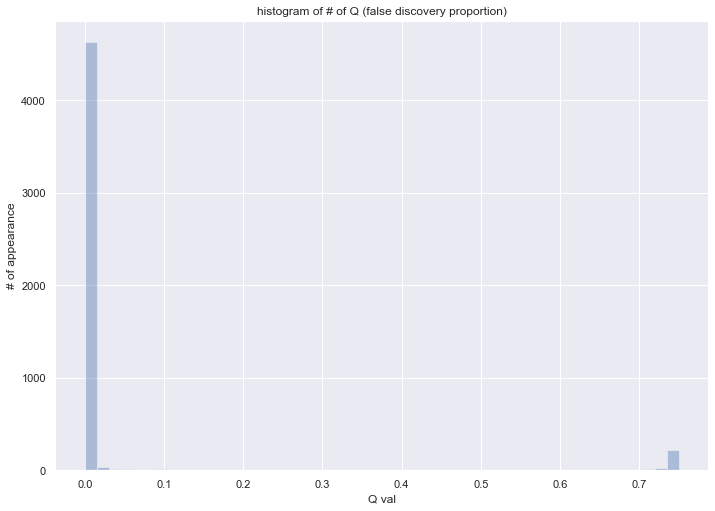

In [254]:
#all_p_vals = sample(ro=0.95)

#explain results:
# sns.distplot(all_p_vals[0,750:])
# sns.distplot(all_p_vals[0,:750])
# sns.distplot(all_p_vals[1,750:])
# sns.distplot(all_p_vals[1,:750])
# line = plt.axvline(0.1, color='purple', alpha=0.6)
# plt.show()


calc_R_V(ro=0.0, flag_split=True)
calc_R_V(ro=0.95, flag_split=True)

